In [110]:
import pandas as pd

In [111]:
train = pd.read_csv("./data/train.csv")

In [112]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [113]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
missing_val_train = train.isnull().sum()
missing_per_train = missing_val_train / len(train) * 100
missing_per_train

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [119]:
missing_val_train_concant = pd.concat([missing_val_train, missing_per_train], axis=1)
missing_val_train_concant.columns = ["No. of missing values", "Perc. of missing values"]
missing_val_train_concant

,No. of missing values,Perc. of missing values
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [8]:
import missingno as msno

<Axes: >

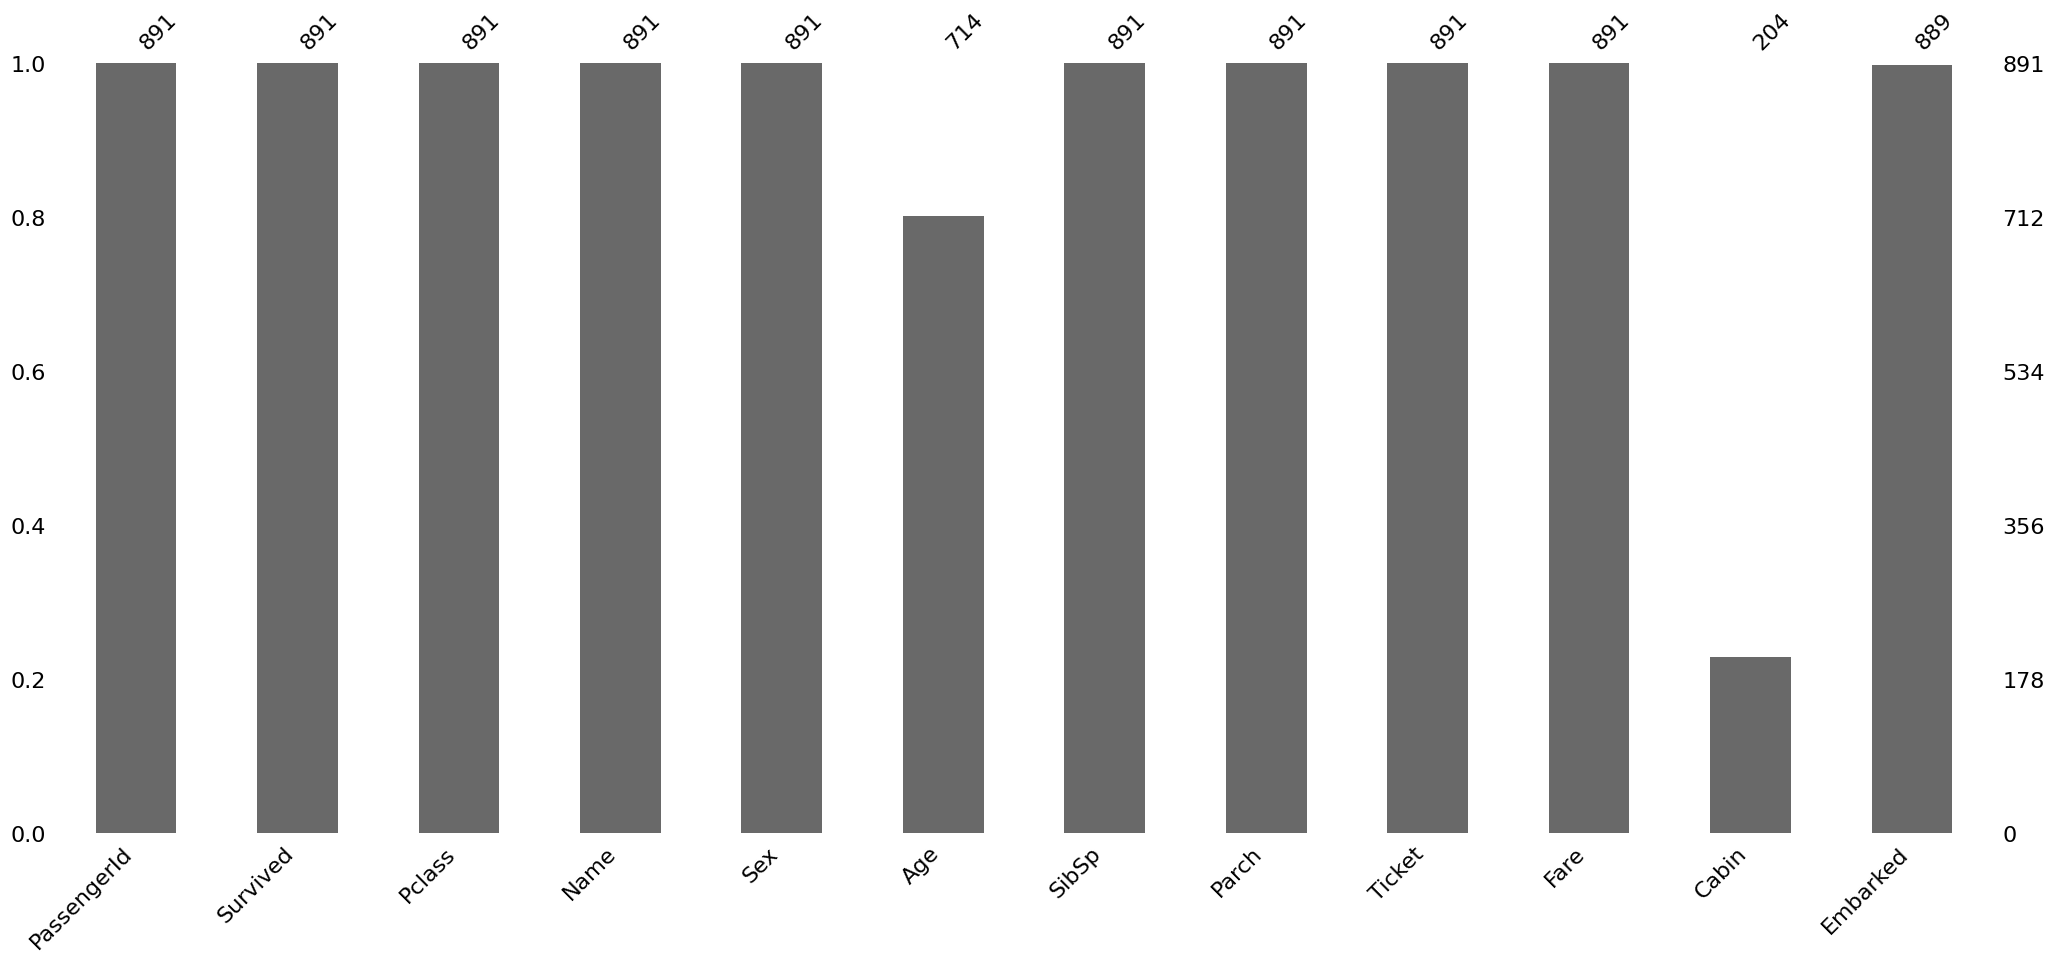

In [9]:
msno.bar(train)

<Axes: >

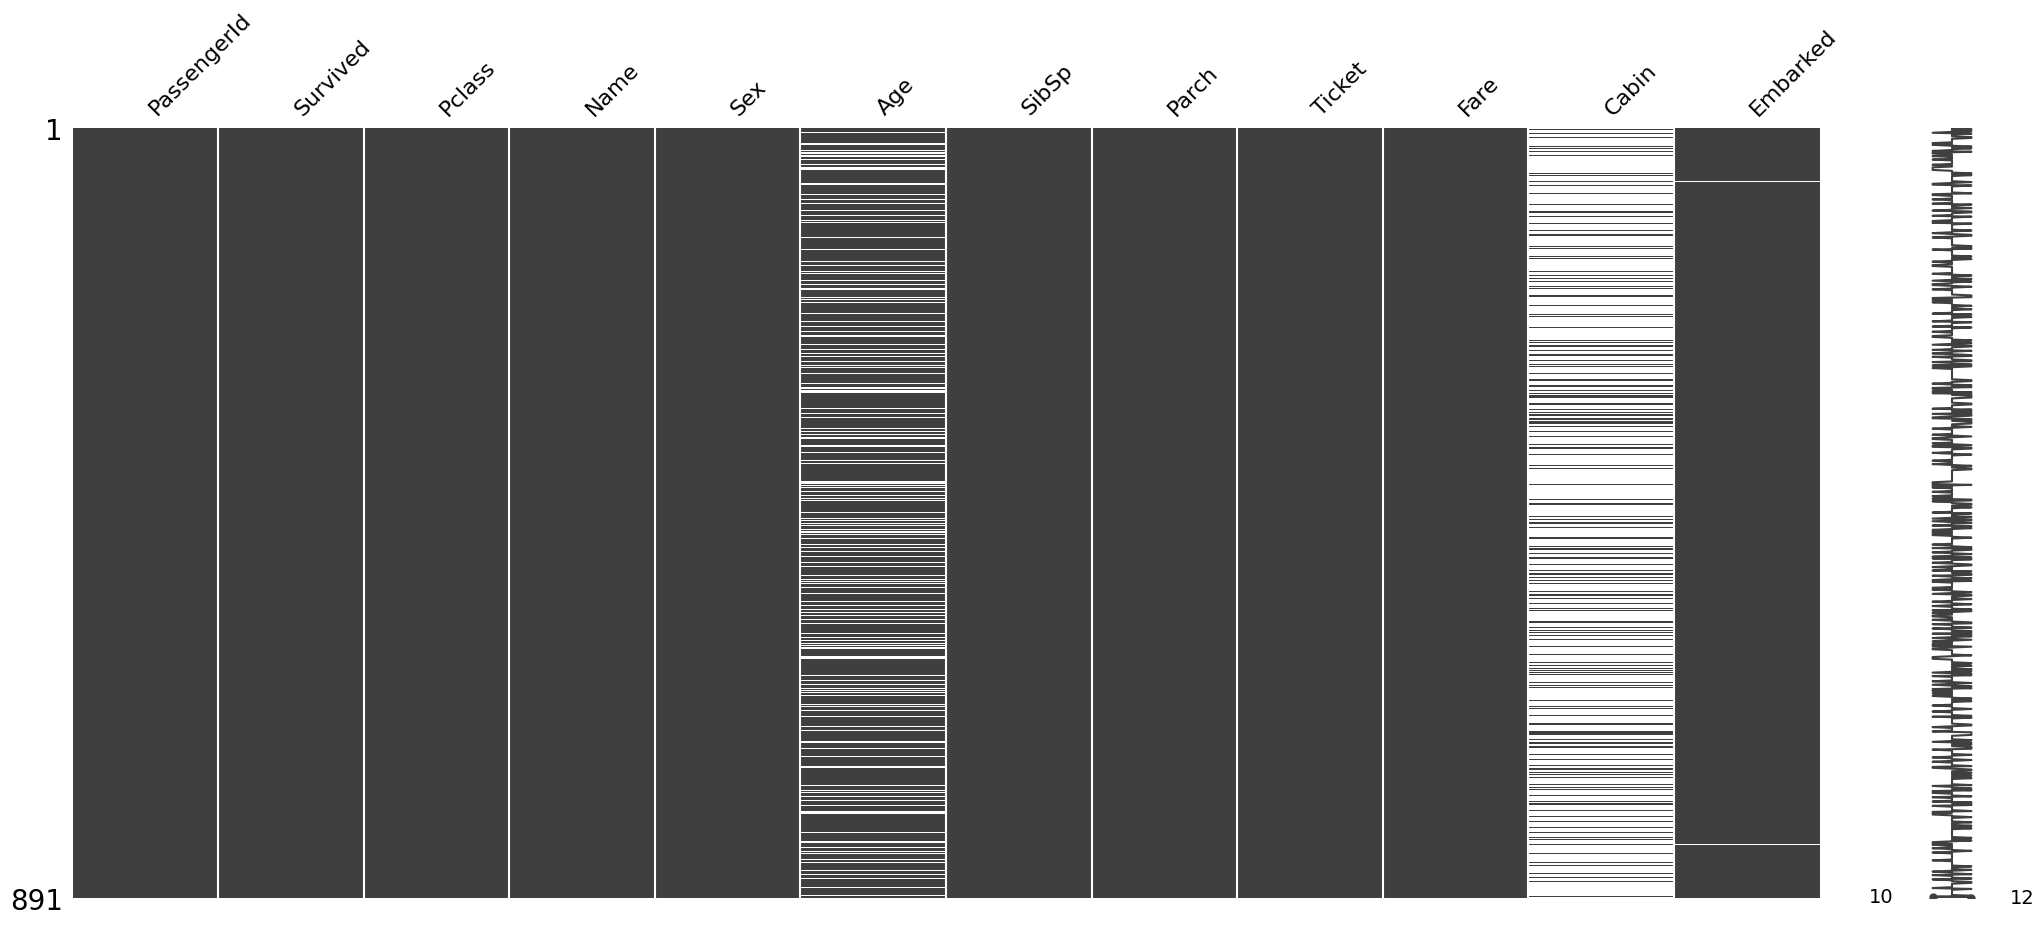

In [10]:
msno.matrix(train)

<Axes: >

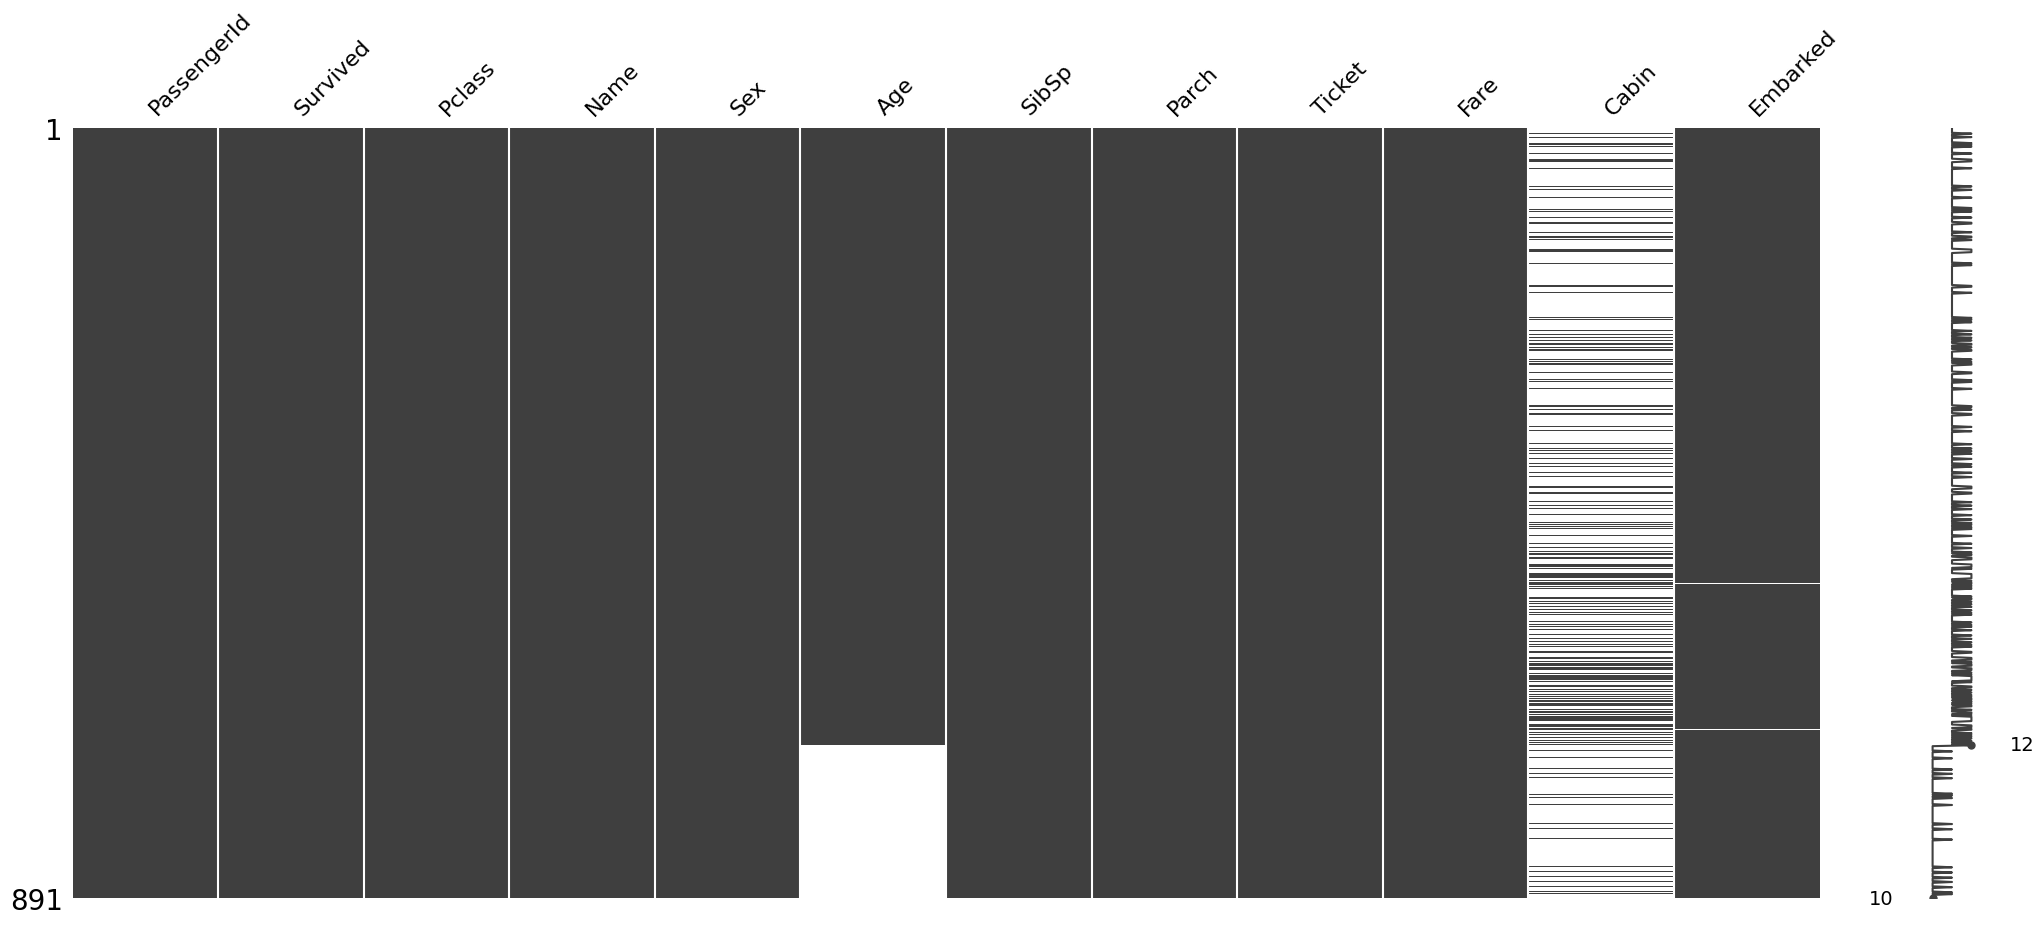

In [11]:
msno.matrix(train.sort_values(['Age']))

<Axes: >

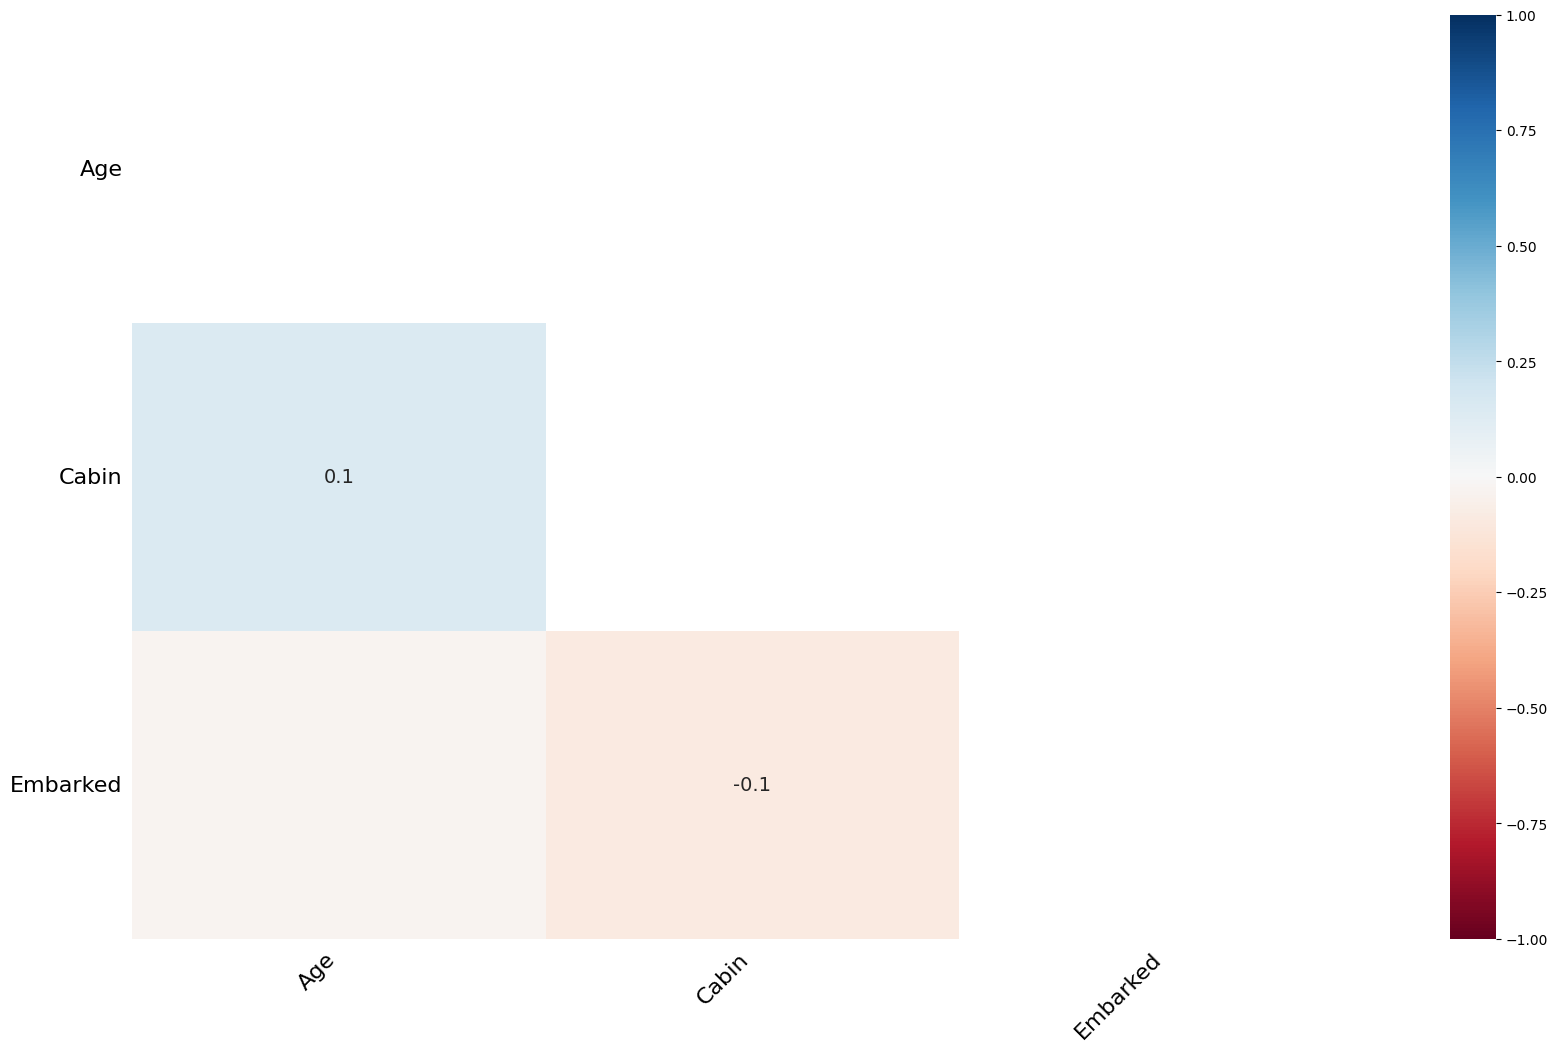

In [12]:
msno.heatmap(train)

### Data change

In [33]:
train1 = train.copy()

In [34]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train1.dropna(subset=['Age'],how='any', inplace=True)

In [36]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='constant', fill_value=0)

In [38]:
train1['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [40]:
train1.iloc[:,:] = imp.fit_transform(train1)

In [41]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
train1 = train.copy()

In [45]:
imp = SimpleImputer(strategy='most_frequent')
train1.iloc[:,:] = imp.fit_transform(train1)

In [46]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### KNN

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [48]:
train1 = train.copy()

In [49]:
scaler = MinMaxScaler()
scaler.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [       nan],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [       nan],
       [0.3842674 ],
       [       nan],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [       nan],
       [0.23347575],
       [       nan],
       [       nan],
       [0.49736115],
       [       nan],
       [       nan],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [       nan],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [       nan],
       [0.03242021],
       [0.23347575],
       [       nan],
       [       nan],
       [     

In [50]:
train1['Age'] = scaler.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

In [51]:
train1['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [54]:
imp = KNNImputer(n_neighbors=2)

In [56]:
train1['Age'] = imp.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

In [58]:
train1 = train.copy()

In [ ]:
train1['Age'] = imp.fit_transform(train1['Age'].to_numpy().reshape(-1 ,1))

In [61]:
train1['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### FFILL & BFILL

In [66]:
train1 = train.copy()

In [67]:
train1['Age'][40:50]

40    40.0
41    27.0
42     NaN
43     3.0
44    19.0
45     NaN
46     NaN
47     NaN
48     NaN
49    18.0
Name: Age, dtype: float64

In [68]:
train1.fillna(method='ffill', inplace=True)

C:\Users\Ace\AppData\Local\Temp\ipykernel_24288\885422607.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train1.fillna(method='ffill', inplace=True)


In [69]:
train1['Age'][40:50]

40    40.0
41    27.0
42    27.0
43     3.0
44    19.0
45    19.0
46    19.0
47    19.0
48    19.0
49    18.0
Name: Age, dtype: float64

In [71]:
train1 = train.copy()

In [73]:
train1['Age'][50:60]

50     7.0
51    21.0
52    49.0
53    29.0
54    65.0
55     NaN
56    21.0
57    28.5
58     5.0
59    11.0
Name: Age, dtype: float64

In [74]:
train1.fillna(method='bfill', inplace=True)

C:\Users\Ace\AppData\Local\Temp\ipykernel_24288\1601070639.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train1.fillna(method='bfill', inplace=True)


In [75]:
train1['Age'][50:60]

50     7.0
51    21.0
52    49.0
53    29.0
54    65.0
55    21.0
56    21.0
57    28.5
58     5.0
59    11.0
Name: Age, dtype: float64

In [97]:
train1 = train.copy()

In [98]:
train1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [99]:
set(train1['Embarked'])

{'C', 'Q', 'S', nan}

In [100]:
classes = list(set(train1['Embarked']))
classes


['C', nan, 'Q', 'S']

In [101]:
dict = {}
for i in range(len(classes)):
    dict[classes[i]] = i

dict

{'C': 0, nan: 1, 'Q': 2, 'S': 3}

In [102]:
train1['Embarked'] = [dict[i] for i in train1['Embarked']]

In [103]:
train1['Embarked']

0      3
1      0
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    0
890    2
Name: Embarked, Length: 891, dtype: int64